# Ridge Regression with algorithm to chose best L2 penalty

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. 

* Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* **Choose best L2 penalty using cross-validation.**
* Assess the final fit using test data.



In [1]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1473041351.log


This non-commercial license of GraphLab Create for academic use is assigned to aguha2@jhu.edu and will expire on February 11, 2017.


# Polynomial regression

In [2]:
def polynomial_sframe(feature, degree):  
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1):    
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**(power))
    return poly_sframe
    

Let's use matplotlib to visualize what a polynomial regression looks like on the house data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sales = graphlab.SFrame('kc_house_data.gl/')

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [6]:
sales = sales.sort(['sqft_living','price'])
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3980300371,2014-09-26 00:00:00+00:00,142000.0,0.0,0.0,290.0,20875,1,0
2856101479,2014-07-01 00:00:00+00:00,276000.0,1.0,0.75,370.0,1801,1,0
1723049033,2014-06-20 00:00:00+00:00,245000.0,1.0,0.75,380.0,15000,1,0
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444,1,0
6896300380,2014-10-02 00:00:00+00:00,228000.0,0.0,1.0,390.0,5900,1,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000,1,0
6303400395,2015-01-30 00:00:00+00:00,325000.0,1.0,0.75,410.0,8636,1,0
4322200105,2015-03-31 00:00:00+00:00,229050.0,1.0,1.0,420.0,3298,1,0
7549801385,2014-06-12 00:00:00+00:00,280000.0,1.0,0.75,420.0,6720,1,0
8658300340,2014-05-23 00:00:00+00:00,80000.0,1.0,0.75,430.0,5050,1,0


Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [70]:
l2_small_penalty = 1e-5

In [8]:
x = sales['sqft_living']
print x

y = sales['price']
y

[290.0, 370.0, 380.0, 384.0, 390.0, 390.0, 410.0, 420.0, 420.0, 430.0, 440.0, 460.0, 470.0, 470.0, 480.0, 480.0, 490.0, 500.0, 520.0, 520.0, 520.0, 520.0, 520.0, 520.0, 530.0, 530.0, 530.0, 540.0, 540.0, 550.0, 550.0, 550.0, 550.0, 560.0, 560.0, 560.0, 560.0, 570.0, 570.0, 570.0, 580.0, 580.0, 580.0, 580.0, 580.0, 590.0, 590.0, 590.0, 590.0, 590.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 610.0, 610.0, 610.0, 610.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 620.0, 630.0, 630.0, 630.0, 630.0, 630.0, 640.0, 640.0, 640.0, 640.0, 640.0, 650.0, 650.0, 650.0, 660.0, 660.0, 660.0, 660.0, 660.0, 660.0, 670.0, 670.0, 670.0, 670.0, 670.0, 670.0, 670.0, 670.0, ... ]


dtype: float
Rows: 21613
[142000.0, 276000.0, 245000.0, 265000.0, 228000.0, 245000.0, 325000.0, 229050.0, 280000.0, 80000.0, 290000.0, 247000.0, 156000.0, 192500.0, 145000.0, 170000.0, 150000.0, 125000.0, 82500.0, 262000.0, 275000.0, 295000.0, 310000.0, 330000.0, 238000.0, 355000.0, 400000.0, 345000.0, 425000.0, 115000.0, 188000.0, 290000.0, 353000.0, 90000.0, 106000.0, 249900.0, 299000.0, 89950.0, 260000.0, 310000.0, 90000.0, 109000.0, 220000.0, 315000.0, 330600.0, 156000.0, 202000.0, 202000.0, 240000.0, 398000.0, 110000.0, 130000.0, 135000.0, 156000.0, 174000.0, 229000.0, 280000.0, 126000.0, 286000.0, 314200.0, 400000.0, 148000.0, 175000.0, 175000.0, 212000.0, 244900.0, 255000.0, 265000.0, 325000.0, 382888.0, 385000.0, 402000.0, 425000.0, 148000.0, 190000.0, 315000.0, 396000.0, 430000.0, 110000.0, 165000.0, 279200.0, 340000.0, 426000.0, 129000.0, 230000.0, 295000.0, 100000.0, 175000.0, 225000.0, 227450.0, 250000.0, 385000.0, 75000.0, 107000.0, 118000.0, 157500.0, 175000.0, 183000.0, 

In [9]:
data = graphlab.SFrame({'X1':x})
data

X1
290.0
370.0
380.0
384.0
390.0
390.0
410.0
420.0
420.0
430.0


In [38]:
#data2 = sales['price']
#data2 = graphlab.SFrame({'price':y})
#data2
data = data.add_column(y,name ='price' )
data
#sa, name='species'

X1,price
290.0,142000.0
370.0,276000.0
380.0,245000.0
384.0,265000.0
390.0,228000.0
390.0,245000.0
410.0,325000.0
420.0,229050.0
420.0,280000.0
430.0,80000.0


Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results.  Thus, rather than using no regularization, we will introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution numerically stable.  (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights.

Hint: make sure to add 'price' column to the new SFrame before calling `graphlab.linear_regression.create()`. Also, make sure GraphLab Create doesn't create its own validation set by using the option `validation_set=None` in this call.

In [10]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

polynomial_features(data, deg=15)


X1,X2,X3,X4,X5,X6,X7
290.0,84100.0,24389000.0,7072810000.0,2.0511149e+12,5.94823321e+14,1.7249876309e+17
370.0,136900.0,50653000.0,18741610000.0,6.9343957e+12,2.565726409e+15,9.4931877133e+17
380.0,144400.0,54872000.0,20851360000.0,7.9235168e+12,3.010936384e+15,1.14415582592e+18
384.0,147456.0,56623104.0,21743271936.0,8.34941642342e+12,3.20617590659e+15,1.23117154813e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
410.0,168100.0,68921000.0,28257610000.0,1.15856201e+13,4.750104241e+15,1.94754273881e+18
420.0,176400.0,74088000.0,31116960000.0,1.30691232e+13,5.489031744e+15,2.30539333248e+18
420.0,176400.0,74088000.0,31116960000.0,1.30691232e+13,5.489031744e+15,2.30539333248e+18
430.0,184900.0,79507000.0,34188010000.0,1.47008443e+13,6.321363049e+15,2.71818611107e+18


In [39]:
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='price', l2_penalty=1e-5,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    return model

In [40]:
def plot_data(data):    
    plt.plot(data['X1'],data['price'],'k.')
    plt.xlabel('sq_ft_living')
    plt.ylabel('price')

In [41]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    #x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(data,deg))
    
    # plot predictions
    plt.plot(data['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
   # plt.axis([0,1,-1.5,2])


In [42]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)


In [43]:
model = polynomial_regression(data, deg=15)
print_coefficients(model)

Learned polynomial for degree 15:
           15             14             13             12
1.137e-53 x  - 3.796e-49 x  - 3.658e-46 x  + 6.905e-41 x 
              11            10             9             8
 + 7.228e-37 x  - 7.29e-33 x  - 2.333e-28 x - 4.788e-25 x
              7             6             5             4             3
 + 4.512e-20 x + 1.711e-16 x - 7.772e-12 x + 5.189e-08 x - 0.0001291 x
           2
 + 0.1346 x + 103.1 x + 1.679e+05


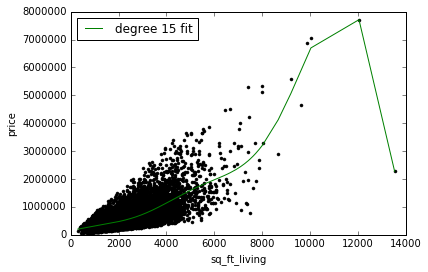

In [44]:
plot_poly_predictions(data,model)

# Observe overfitting

Polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. 

First, split the data into split the sales data into four subsets of roughly equal size and call them `set_1`, `set_2`, `set_3`, and `set_4`. Use `.random_split` function and make sure you set `seed=0`. 

In [45]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

Fit a 15th degree polynomial on `set_1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.
 

In [46]:
data_set1 = graphlab.SFrame({'X1':set_1['sqft_living'],'price': set_1['price']})
data_set2 = graphlab.SFrame({'X1':set_2['sqft_living'],'price': set_2['price']})
data_set3 = graphlab.SFrame({'X1':set_3['sqft_living'],'price': set_3['price']})
data_set4 = graphlab.SFrame({'X1':set_4['sqft_living'],'price': set_4['price']})

data_set3

X1,price
390.0,245000.0
480.0,145000.0
480.0,170000.0
520.0,262000.0
520.0,295000.0
530.0,238000.0
530.0,355000.0
540.0,425000.0
560.0,90000.0
560.0,106000.0


In [47]:
model_set1 = polynomial_regression(data_set1, deg=15)
print_coefficients(model_set1)

Learned polynomial for degree 15:
            15             14           13             12
-2.338e-53 x  + 1.527e-49 x  + 3.8e-45 x  + 2.851e-41 x 
              11             10             9             8
 - 1.627e-37 x  - 6.838e-33 x  - 6.928e-29 x + 1.593e-25 x
              7             6             5             4             3
 + 1.069e-20 x + 5.975e-17 x - 3.798e-13 x - 1.529e-08 x + 0.0001415 x
           2
 - 0.3973 x + 585.9 x + 9306


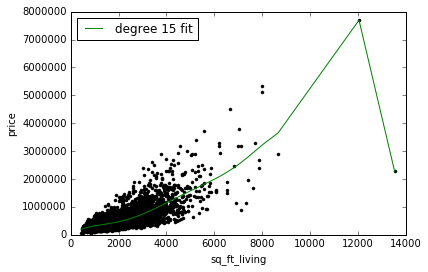

In [48]:
plot_poly_predictions(data_set1,model_set1)

In [49]:
model_set2 = polynomial_regression(data_set2, deg=15)
print_coefficients(model_set2)

Learned polynomial for degree 15:
           15             14             13             12
1.301e-50 x  - 1.004e-46 x  - 1.024e-42 x  - 9.413e-40 x 
              11             10             9             8
 + 6.517e-35 x  + 6.218e-31 x  - 2.713e-29 x - 4.597e-23 x
              7             6             5             4             3
 - 2.064e-19 x + 2.512e-15 x + 6.843e-12 x - 1.152e-07 x + 0.0004388 x
           2
 - 0.7678 x + 783.5 x - 2.512e+04


In [50]:
model_set3 = polynomial_regression(data_set3, deg=15)
print_coefficients(model_set3)

Learned polynomial for degree 15:
            15             14             13             12
-2.858e-51 x  + 3.556e-47 x  + 2.426e-43 x  - 1.066e-39 x 
              11            10             9             8
 - 2.968e-35 x  - 1.72e-31 x  + 1.243e-27 x + 2.571e-23 x
              7             6             5             4             3
 + 4.088e-20 x - 2.082e-15 x - 2.261e-12 x + 1.154e-07 x - 0.0005283 x
          2
 + 1.029 x - 759.3 x + 4.624e+05


In [51]:
model_set4 = polynomial_regression(data_set4, deg=15)
print_coefficients(model_set4)

Learned polynomial for degree 15:
           15             14             13             12
4.395e-50 x  - 6.029e-46 x  - 1.799e-42 x  + 2.334e-38 x 
              11             10             9             8
 + 2.399e-34 x  + 1.602e-31 x  - 1.324e-26 x - 7.999e-23 x
              7             6             5             4             3
 + 4.215e-19 x + 4.818e-15 x - 2.202e-11 x - 6.383e-08 x + 0.0005553 x
          2
 - 1.225 x + 1248 x - 1.702e+05


# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument `l2_penalty=1e5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above. 

In [52]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='price', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and shuffle the remainder. 

In [61]:
(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [62]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


Let us familiarize ourselves with array slicing with SFrame. To extract a continuous slice from an SFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `train_valid_shuffled`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. SFrame has `append()` method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the `train_valid_shuffled` dataframe.

Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [63]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set= train_valid_shuffled[start:end+1] 
        first_train= train_valid_shuffled[0:start]
        second_train= train_valid_shuffled[end+1:n+1]
        training_set= first_train.append(second_train)
        
        model = graphlab.linear_regression.create(polynomial_features(training_set,deg), 
                                              target='price', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
          # predict on validation set 
        y_test_predicted = model.predict(validation_set)
            # compute squared error
        next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()

   


Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, we can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, We should generate polynomial features in advance and re-use them throughout the loop. 

In [64]:
import numpy as np
l2_penalty_values = np.logspace(3, 9, num=13)
print l2_penalty_values

[  1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07   3.16227766e+07   1.00000000e+08   3.16227766e+08
   1.00000000e+09]


In [65]:
data_train = graphlab.SFrame({'X1':train_valid_shuffled['sqft_living'],'price': train_valid_shuffled['price']})



In [68]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, deg):
    
    #polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    #num_folds = len(data)
    #folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    
    n = len(data)    
    
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
    
        for i in xrange(k):
            start = (n*i)/k
            end = (n*(i+1))/k-1
            validation_set= data[start:end+1] 
            first_train= data[0:start]
            second_train= data[end+1:n+1]
            training_set= first_train.append(second_train)
            
            polynomial_features(training_set, deg)

            model = graphlab.linear_regression.create(polynomial_features(training_set,deg), 
                                              output_name, l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['price'])**2).sum()

        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [71]:
l2_penalty_mse = []

(l2_penalty_mse, best_l2_penalty) = k_fold_cross_validation(10, l2_small_penalty, data_train, output_name = 'price', deg=15)

In [72]:
print l2_penalty_mse

[2190995485766999.0, 2293631611404933.0, 2412595947439710.0, 2523656263653668.5, 2600972081692778.5, 2638645912049781.0, 2653058407086781.0, 2657976466690096.0, 2659575408342869.5, 2660085772497099.5, 2660247650693849.0, 2660298890209547.5, 2660315098494158.0]


In [73]:
print best_l2_penalty

1000.0
